# Quantum Teleportation
### Prepare circuit

In [1]:
import sys
sys.path.append('../')
from methods import run_main_loop
import qiskit
import numpy as np

In [2]:
# Create a Quantum Register called "qr" with 2 qubits.
qr = qiskit.QuantumRegister(3)
# Create a Classical Register called "cr" with 2 bits.
cr = qiskit.ClassicalRegister(3)

In [3]:
#prepare a state rotated by theta on the qubit 0
def prepare_state(theta):
    circuit=qiskit.QuantumCircuit(qr, cr)
    circuit.rx(theta, qr[0])
    return(circuit)

In [4]:
#a circuit to teleport state from qubit 0 to qubit 2

teleport=qiskit.QuantumCircuit(qr, cr)

#prepare bell state on qubits 1 and 2
teleport.cx(qr[1], qr[2])
teleport.h(qr[1])

#measure qubits 0 and 1
teleport.measure(qr[0], cr[0])
teleport.measure(qr[1], cr[1])

In [5]:
#a circuit to measure i-th qubit to i-th bit
def measure(i):
    circuit=qiskit.QuantumCircuit(qr, cr)
    circuit.measure(qr[i],cr[i])
    return(circuit)

In [6]:
circuits=[]
for theta in np.linspace(0,np.pi,10):
    qc_test=prepare_state(theta)+measure(0)
    circuits.append(qc_test)
    qc_teleport=prepare_state(theta)+teleport+measure(2)
    circuits.append(qc_teleport)

### Execute

In [7]:
sim=qiskit.execute(circuits,'local_qasm_simulator')
counts=[sim.result().get_counts(c) for c in circuits]

In [ ]:
run_main_loop(circuits)
#ibmqx4 and ibmqx2 both currently under maitenence
#10 jobs sent for execution

Iteration number:  0
Current credits number is 0 which is less than 3. Waiting 10 minutes to continue.
Current credits number is 0 which is less than 3. Waiting 10 minutes to continue.


### Simulation data analysis

In [63]:
import pandas as pd
df=pd.DataFrame(counts)
df=df.fillna(0)
df['job']=np.tile(['test','teleport'],10)
df['alpha']=(df['000']+df['010'])/1024
df['beta']=(df['001']+df['011'])/1024
df

,000,001,010,011,job,theta,alpha,beta
0,1024.0,0.0,0.0,0.0,test,0.000000,1.000000,0.000000
1,528.0,0.0,496.0,0.0,teleport,0.000000,1.000000,0.000000
2,993.0,31.0,0.0,0.0,test,0.349066,0.969727,0.030273
3,495.0,10.0,501.0,18.0,teleport,0.349066,0.972656,0.027344
4,890.0,134.0,0.0,0.0,test,0.698132,0.869141,0.130859
5,458.0,57.0,451.0,58.0,teleport,0.698132,0.887695,0.112305
6,777.0,247.0,0.0,0.0,test,1.047198,0.758789,0.241211
7,366.0,130.0,393.0,135.0,teleport,1.047198,0.741211,0.258789
8,593.0,431.0,0.0,0.0,test,1.396263,0.579102,0.420898
9,316.0,204.0,284.0,220.0,teleport,1.396263,0.585938,0.414062


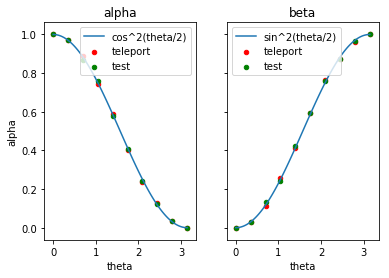

In [109]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
color={'test':'green','teleport':'red'}
for key,group in df.groupby('job'):
    group.plot.scatter(x='theta',y='alpha',ax=ax1,label=key,c=color[key])
    group.plot.scatter(x='theta',y='beta',ax=ax2,label=key,c=color[key])
ax1.plot(np.linspace(0,np.pi,100),np.cos(np.linspace(0,np.pi,100)/2)**2,label='cos^2(theta/2)')
ax2.plot(np.linspace(0,np.pi,100),np.sin(np.linspace(0,np.pi,100)/2)**2,label='sin^2(theta/2)')
ax1.legend()
ax2.legend()
ax1.set_title('alpha')
ax2.set_title('beta')
plt.show()

In [99]:
agg_data=df.pivot_table(values=['alpha','beta'], index='theta', columns='job', aggfunc='sum')
agg_data

alpha                beta          
job       teleport      test  teleport      test
theta                                           
0.000000  1.000000  1.000000  0.000000  0.000000
0.349066  0.972656  0.969727  0.027344  0.030273
0.698132  0.887695  0.869141  0.112305  0.130859
1.047198  0.741211  0.758789  0.258789  0.241211
1.396263  0.585938  0.579102  0.414062  0.420898
1.745329  0.404297  0.406250  0.595703  0.593750
2.094395  0.235352  0.242188  0.764648  0.757812
2.443461  0.125977  0.125000  0.874023  0.875000
2.792527  0.037109  0.036133  0.962891  0.963867
3.141593  0.000000  0.000000  1.000000  1.000000

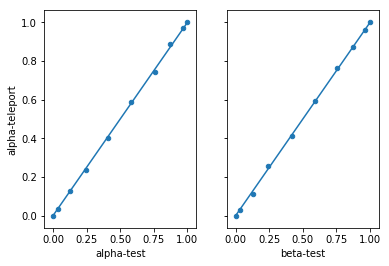

In [113]:
f, (a1,a2) = plt.subplots(1, 2, sharey=True)
agg_data.plot.scatter(x=('alpha', 'test'),y=('alpha', 'teleport'),ax=a1)
agg_data.plot.scatter(x=('beta', 'test'),y=('beta', 'teleport'),ax=a2)
a1.set_ylabel('alpha-teleport')
a1.set_xlabel('alpha-test')
a2.set_ylabel('beta-teleport')
a2.set_xlabel('beta-test')
a1.plot([0,1],[0,1])
a2.plot([0,1],[0,1])
plt.show()